**Необходимые библиотеки**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
from math import log
from sklearn.metrics import accuracy_score

**Функции с семинаров**

In [ ]:


def classify(classifier, features):
    classes_probs, features_probs = classifier
    epsilon = 10e-12
    return min(classes_probs.keys(),  # calculate argmin(-log(P(C|O))) -> argmax(P(C|O))
        key = lambda cl: -log(classes_probs[cl]) + \
            sum(-log(features_probs[cl, feature] + epsilon) for feature in features))


# возвращение последнего элемента (буквы для имени)
def get_features(name): return (name[-1]) # get last letter from name




def train_last_letter(data_train):
    classes, freq = defaultdict(lambda:0), defaultdict(lambda:0)
    for feats, label in data_train:
        classes[label] += 1                 # count classes frequencies
        for feat in feats:
            freq[label, feat] += 1          # count features frequencies

    for label, feat in freq:                # normalize features frequencies
        freq[label, feat] /= classes[label]
    for c in classes:                       # normalize classes frequencies
        classes[c] /= len(data_train)
    print(classes, freq)
    return classes, freq

**Задание 1: Байесовская классификация**

*Пункт 1. Открыть файл names.csv*

In [ ]:
data = pd.read_csv("names.csv")

In [ ]:
data.head(5)

,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


In [ ]:
data.shape
# 258000 строк и 4 столбца

(258000, 4)

*Пункт 2 - разделить выборку на обуч. и тест. (70% к 30%). Также уберём ненужные столбцы (год, процент)*

In [ ]:
data.columns # шапка

Index(['year', 'name', 'percent', 'sex'], dtype='object')

In [ ]:
data = data[['name','sex']]
data_train, data_test = train_test_split(data,test_size=0.3,random_state=40)
data_train

,name,sex
11413,Dee,boy
223437,Bridgette,girl
245165,Alison,girl
207492,Ladonna,girl
18142,Calvin,boy
...,...,...
93176,Edwin,boy
211109,Rita,girl
30727,Winfred,boy
112859,Tayler,boy


*В каждом имени оставим 1 букву*

In [ ]:
# обращаемся к столбцу 'name' и преобразуем каждое имя в букву
data_train['name'] = data_train['name'].apply(get_features)
data_train

,name,sex
11413,e,boy
223437,e,girl
245165,n,girl
207492,a,girl
18142,n,boy
...,...,...
93176,n,boy
211109,a,girl
30727,d,boy
112859,r,boy


*Пункт 3 - обучить наивную байесовскую классификацию из файла Sem2.ipynb
  на X_test. Затем с помощью метода classify() разменить имена по полу в
  тестировочном наборе данных*

In [ ]:
classifier = train_last_letter(data_train.values)

defaultdict(<function train_last_letter.<locals>.<lambda> at 0x79ff56c74430>, {'boy': 0.5002436323366556, 'girl': 0.4997563676633444}) defaultdict(<function train_last_letter.<locals>.<lambda> at 0x79ff8dc83d90>, {('boy', 'e'): 0.13785088107677324, ('girl', 'e'): 0.3021294983159014, ('girl', 'n'): 0.08090320865094841, ('girl', 'a'): 0.3831545825208296, ('boy', 'n'): 0.213694323917471, ('boy', 'p'): 0.003154609049853892, ('girl', 'l'): 0.035244194291792236, ('boy', 'd'): 0.07296555388293634, ('boy', 'l'): 0.08310457805720357, ('girl', 'y'): 0.07825518525084205, ('girl', 'i'): 0.02788734266973941, ('boy', 'o'): 0.06322500664128221, ('boy', 'g'): 0.005611883467634818, ('boy', 'y'): 0.11175064199061366, ('boy', 't'): 0.05249933587177898, ('boy', 'i'): 0.00560081466395112, ('girl', 'h'): 0.02477397624534657, ('girl', 's'): 0.022414022336465167, ('boy', 's'): 0.07889843265739839, ('boy', 'h'): 0.026841848932967326, ('girl', 'o'): 0.005129852862967559, ('boy', 'a'): 0.016160453378198884, ('gi

In [ ]:
classifier

(defaultdict(<function __main__.train_last_letter.<locals>.<lambda>()>,
             {'boy': 0.5002436323366556, 'girl': 0.4997563676633444}),
 defaultdict(<function __main__.train_last_letter.<locals>.<lambda>()>,
             {('boy', 'e'): 0.13785088107677324,
              ('girl', 'e'): 0.3021294983159014,
              ('girl', 'n'): 0.08090320865094841,
              ('girl', 'a'): 0.3831545825208296,
              ('boy', 'n'): 0.213694323917471,
              ('boy', 'p'): 0.003154609049853892,
              ('girl', 'l'): 0.035244194291792236,
              ('boy', 'd'): 0.07296555388293634,
              ('boy', 'l'): 0.08310457805720357,
              ('girl', 'y'): 0.07825518525084205,
              ('girl', 'i'): 0.02788734266973941,
              ('boy', 'o'): 0.06322500664128221,
              ('boy', 'g'): 0.005611883467634818,
              ('boy', 'y'): 0.11175064199061366,
              ('boy', 't'): 0.05249933587177898,
              ('boy', 'i'): 0.005600814663951

*Пункт 4. Посчитать среднюю долю правильных "ответов" классификатора.*

In [ ]:
count_of_correct_answers = 0
for name, label in data_test.values:
  if (classify(classifier), get_features(name) == label):
    count_of_correct_answers += 1

print(f"Доля правильных ответов классификатора: {count_of_correct_answers / data_test.shape[0]}")

*Классификация другими способами (несколько букв или полное имя)*

In [ ]:
# по первой и последней букве
def get_features_two_letters(name: str) -> str:
    return ''.join([name[0], name[-1]])

In [ ]:
# по первой и второй букве
def get_features_two_letters(name: str) -> str:
    return ''.join([name[0], name[1]])

In [ ]:

def train(data_train):
    # общее кол-во букв
    all_letters_in_class = defaultdict(lambda:0)
    # вероятность класса (будет хранить отношение кол-во имён / на общее кол-во - длина)
    names_in_class = defaultdict(lambda:0)
    # вероятность бувы в данном классе
    letters_in_class = defaultdict(lambda:0)


    # идём по признакам и полу
    for features, label in data_train:
        names_in_class[label] += 1
        for feature in features:
            letters_in_class[label, feature] += 1
        all_letters_in_class[label] += len(features)

    for label, feature in letters_in_class:
        letters_in_class[label, feature] /= all_letters_in_class[label]
    for c in names_in_class:
        names_in_class[c] /= len(data_train)

    return names_in_class, letters_in_class

In [ ]:
data = pd.read_csv("names.csv")

data = data[['name', 'sex']]
data_train, data_test = train_test_split(data, test_size=0.3, random_state=1)

data_train['name'] = data_train['name'].apply(get_features_two_letters)

classifier = train(data_train.values)

right_answers_count = 0
for name, label in data_test.values:
    if (classify(classifier, get_features_two_letters(name)) == label):
        right_answers_count += 1

print(f"Доля правильных ответов классификатора: {right_answers_count / data_test.shape[0]}")

Доля правильных ответов классификатора: 0.581343669250646


*Гауссовский классификатор*

In [ ]:
data = pd.read_csv("names.csv")
X = data['name']
y = data['sex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Создание объекта
vectoriser = TfidfVectorizer()

# Преобразование текстового корпуса в матрицу TF-IDF признаков
X_train_vec = vectoriser.fit_transform(X_train)

# объект модели
model = GaussianNB()

# размер шага в выборке для обучения???
batch_size = 1000
for i in range(0, len(X_train), batch_size):
    # размер данных
    X_batch = X_train_vec[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]
    # обучение модели
    model.partial_fit(X_batch.toarray(), y_batch, classes=np.unique(y))

In [ ]:
count_of_correct_answers = 0
for i in range(0, X_test.shape[0], batch_size):
    X_batch_test = X_test_vec[i:i + batch_size].toarray()
    y_batch_test = y_test[i:i + batch_size]
    batch_predictions = model.predict(X_batch_test)
    count_of_correct_answers += np.sum(batch_predictions == y_batch_test)

print(f"Доля правильных ответов классификатора: {count_of_correct_answers / X_test.shape[0]}")

**Задание 2: Классификация ирисов**

*Необходимые библиотеки*

In [ ]:
from sklearn.datasets import load_iris
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis

*Пункт 1-2. Взять датасет описание цветков по сортам из load_iris и разделить на обуч и тест выборку*

In [ ]:
# df - DataFrame - содержит данные об ирисах
df = load_iris()


X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


# LDA (метрика) и обучаем на X и y
# default - svd
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

labels = model.predict(X_test)

print(f"Accuracy: {np.mean(labels == y_test)}")

Accuracy: 0.9555555555555556


*Пункт 3. Реализоваться классификацию с помощью LDA*

*Поиграемся с параметрами*

In [ ]:
df = load_iris()
# Посмотрим данные об ирисах (размер, признаки и как выглядит таблицы)
df.data.shape

(150, 4)

In [ ]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris_df = pd.DataFrame(df.data, columns=df.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Разделение выборки
X = df.data
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
# Линейные наименьшие квадраты (lsqr)
model = LinearDiscriminantAnalysis(solver='lsqr')
model.fit(X_train, y_train)
labels = model.predict(X_test)

print(f"Accuracy: {np.mean(labels == y_test)}")

Accuracy: 0.9555555555555556


In [ ]:
# Метод собственных значений (eigen)
model = LinearDiscriminantAnalysis(solver='eigen')
model.fit(X_train, y_train)
labels = model.predict(X_test)

print(f"Accuracy: {np.mean(labels == y_test)}")

Accuracy: 0.9555555555555556


*Сравнить заложенные методы с реализацией из семинара*

*Функция из семинара*

In [ ]:
def LDA_dimensionality(X, y, k):
    '''
    X - набор данных, y - метка, k - целевой размер
    '''
    label_ = list(set(y))

    X_classify = {}

    for label in label_:
        X1 = np.array([X[i] for i in range(len(X)) if y[i] == label])
        X_classify[label] = X1

    mju = np.mean(X, axis=0)
    mju_classify = {}

    for label in label_:
        mju1 = np.mean(X_classify[label], axis=0)
        mju_classify[label] = mju1

    #St = np.dot((X - mju).T, X - mju)

    Sw = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sw += np.dot((X_classify[i] - mju_classify[i]).T,
                     X_classify[i] - mju_classify[i])

    # Sb=St-Sw

    Sb = np.zeros((len(mju), len(mju)))  # Вычислить матрицу внутриклассовой дивергенции
    for i in label_:
        Sb += len(X_classify[i]) * np.dot((mju_classify[i] - mju).reshape(
            (len(mju), 1)), (mju_classify[i] - mju).reshape((1, len(mju))))

    eig_vals, eig_vecs = np.linalg.eig(
        np.linalg.inv(Sw).dot(Sb))  # Вычислить собственное значение и собственную матрицу Sw-1 * Sb

    sorted_indices = np.argsort(eig_vals)
    topk_eig_vecs = eig_vecs[:, sorted_indices[:-k - 1:-1]]  # Извлекаем первые k векторов признаков
    return topk_eig_vecs

In [ ]:
df = load_iris()

X = df.data
y = df.target

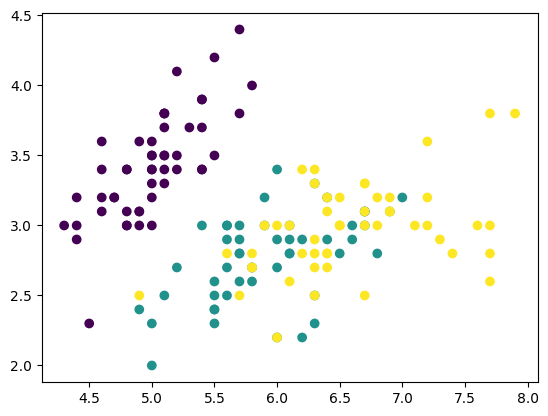

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

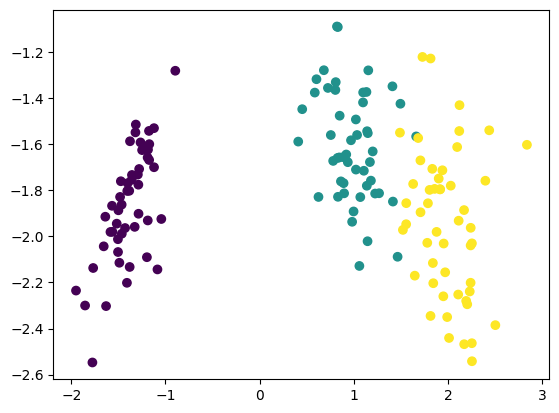

In [ ]:
W = LDA_dimensionality(X, y, 2)
X_new = np.dot((X), W)
plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y)
plt.show()

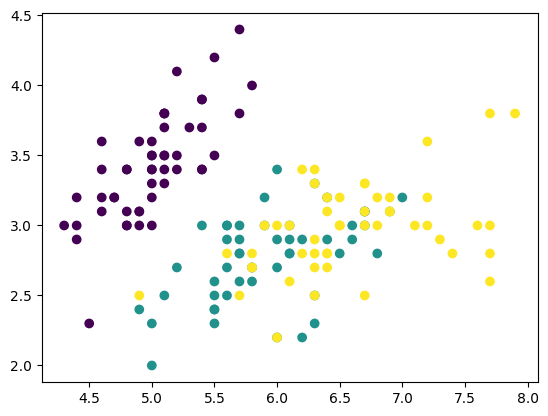

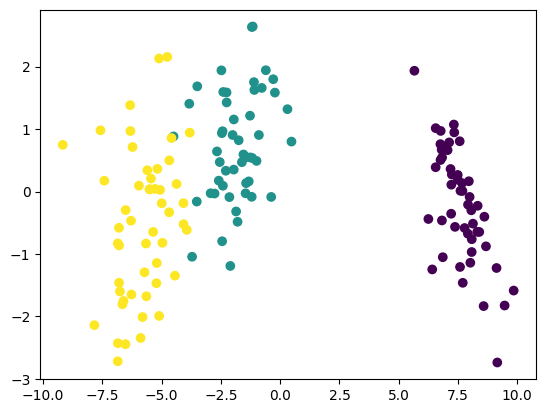

In [ ]:
df = load_iris()

X = df.data
y = df.target

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

model = LinearDiscriminantAnalysis()
X_new = model.fit(X, y).transform(X)

plt.scatter(X_new[:, 0], X_new[:, 1], marker='o', c=y)
plt.show()

**Задание 3. kNN**

*Необходимые библиотеки*

In [ ]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier

*Пункт 1-3. Открыть датасет через load_wine() о трёх сортах вина. Использовать 3 подхода к делению выборки на трен и тест при random_state = 42. Для каждого метода при k от 1 до 50 прогнать sklearn.neighbors.KNeighborsClassifier и посчитать долю правильных ответов. Оценить и при каком k даёт лучший результат*

In [ ]:
df = load_wine()
X = df.data
y = df.target

In [ ]:
# KFold
from sklearn.model_selection import KFold

In [ ]:

kfold = KFold(n_splits=5, random_state=42, shuffle=True)



precision_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in kfold.split(X):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)

    precision_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(precision_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(precision_array))))

Number of neighbours with max accuracy: 1
Max accuracy: 0.73


In [ ]:
# LOO
from sklearn.model_selection import LeaveOneOut

In [ ]:
loo = LeaveOneOut()

precision_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in loo.split(X):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)
    precision_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(precision_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(precision_array))))

Number of neighbours with max accuracy: 1
Max accuracy: 0.77


In [ ]:
# Stratified KFold
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

precision_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in skf.split(X, y):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)
    precision_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(precision_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(precision_array))))

Number of neighbours with max accuracy: 1
Max accuracy: 0.72


**Вывод:** Лучшего всего показал Leave One Out, так какак он перебирает наибольшое кол-во деление выборки. При k = 1 все три кросс-валидации достигают наилучшей точности

*Пункт 4. Произвести масштабирование признаков с помощью sklearn.preprocessing.scale. Найти оптимальное k на трёх кросс-валидаций и проверить, изменился ли оптимальный метод*

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
# Cтандартизация по столбцам
X = scale(X, axis=0)

In [ ]:
# KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

accuracy_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in kfold.split(X):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)

    accuracy_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(accuracy_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(accuracy_array))))

Number of neighbours with max accuracy: 29
Max accuracy: 0.98


In [ ]:
# LOO

loo = LeaveOneOut()

precision_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in loo.split(X):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)
    precision_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(precision_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(precision_array))))

Number of neighbours with max accuracy: 36
Max accuracy: 0.98


In [ ]:
# Stratified KFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

precision_array = []
for n in range(1, 50 + 1):
    model = KNeighborsClassifier(n_neighbors=n)

    accuracy = []
    for train_indices, test_indices in skf.split(X, y):
        X_train, X_test, y_train, y_test = X[train_indices], X[test_indices], y[train_indices], y[test_indices]
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))

    result_accuracy = np.mean(accuracy)
    precision_array.append(result_accuracy)

print("Number of neighbours with max accuracy: {}".format(np.argmax(np.array(precision_array)) + 1))
print("Max accuracy: {0:.2f}".format(np.max(np.array(precision_array))))

Number of neighbours with max accuracy: 13
Max accuracy: 0.98


Для всех методов accuracy составила 0.98. Максимальную результат доистигаем при k ближе к середение отрезка.